In [134]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as mod
import sklearn.neighbors as nei

# Programming for Data Analysis

## Breast Cancer Wisconsin (Diagnostic) Data Set

### - What is the Breast Cancer Wisconsin dataset?

The Breast Cancer Wisconsin dataset is a dataset that contains records of characteristics of the cell nuclei from a digitized image of a fine needle aspiration (FNA) of a breast mass. A [Fine needle aspiration](https://www.webmd.com/a-to-z-guides/fine-needle-aspiration) is a type of biopsy procedure where a thin needle is inserted into an area of abnormal-appearing tissue or body fluid. This records are then used to determine if the tissue is classified as benign or malignant.

Below we can find a example of a image for each one of the cases:


![Benign cancer image](https://inferentialthinking.com/_images/benign.png) ![Malignant cancer image](https://inferentialthinking.com/_images/malignant.png)

As we can see in the image above, the shapes and margins of benign and malignant samples are different, and this can indicate which group they belong. 
According to [Holland-Frei Cancer Medicine]( https://www.ncbi.nlm.nih.gov/books/NBK12642/) shapes more round are usually benign type, which we can clearly see in the image above. While an irregular shape suggests a greater likelihood of malignancy, which is also show in the picture above. 


**Data set Attributes information:**

The dataset cointaisn a total of 569 samples and has 32 attributes which are divided into columns as shown below:

- ID number
- Diagnosis (M = malignant, B = benign)
- And the mean, standard error and worst case for each of the attributes below:
<ol>
  <li>radius (mean of distances from center to points on the perimeter)</li>
  <li>texture (standard deviation of gray-scale values)</li>
  <li>perimeter</li>
  <li>area</li>
  <li>smoothness (local variation in radius lengths)</li>  
  <li>compactness (perimeter^2 / area - 1.0)</li>  
  <li>concavity (severity of concave portions of the contour)</li>  
  <li>concave points (number of concave portions of the contour)</li>  
  <li>symmetry</li>  
  <li>fractal dimension ("coastline approximation" - 1)</li>  
    
</ol>


The first two columns are the Sample Id and diagnosis respectively. The diagnosis can be malignant (M) or benign (B) which are medical terms for a tumour. A benign are the ones not considered cancerous while the  malignant ones are considered cancerous.

## Classifiers

In Machine Learning classifiers are algorithms that categorizes data into set or sets of classes.  Classifiers can be divided into supervised and unsupervised classifiers.

- **Supervised Learning**

Supervised learning classifiers are the most common approach to machine learning, these classifiers predict outcomes based on models that are manually tagged or sorted the data contains the correct inputs and outputs which helps the model to learn faster. 
There are two types supervised learning classifiers: Regression and Classification
-	Regression model predicts output based on the information given, for example, price of a car taking into the account the car model, year, colour, and other parameters. An example of regression classifiers is Logistic regression

-	Classification model on the other hand, groups the results inside a class, for example, it can sort out based on the information given,  a tissue from a biopsy is benign or malignant. 



- **Unsupervised Learning**

For unsupervised classifiers the data that is loaded into the model is not sorted or labelled, the classifier learns from the data itself, taking into the account its characteristics. Unsupervised classifiers can be used for clustering and sorting the data into groups based on their similarities, finding fraudulent activities using anomaly detection. However, it can provide less precise information and results since the data was not labelled and the classifier must do it itself.
There are two types of techniques used in unsupervised learning: Clustering and Association.
-	Clustering deals with finding a pattern in an unsorted data, and grouping the data into this pattern, sorting it inside specific groups according with its characteristics. 
-	Association deal with the relationship between objects in a dataset, it is used to find new patterns that objects share with each other.


Below we are going to take a look at some of most common supervised classifiers used for analysing and training on the Breast Cancer Wisconsin dataset

 - ### Support Vector Machines (SVM)

- ### Decision Tree Classifier (J48)

- ### K-Nearest Neighbor (KNN)

## Statistical Analysis

First lets import our data and take a look at it.

In [135]:
# importing the dataset
df = pd.read_csv("breast_cancer_wisconsin_d.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### - Cleaning and adjusting the data

As we can see the dataset has some columns that are not relevant for our analysis, such as "ID and "Unnamed: 32" we are going to drop these columns.

In [136]:
# Dropping the ID and Unnamed: 32 Columns
df.drop(['id', 'Unnamed: 32'],axis = 1,inplace=True)


#df['diagnosis'].replace("M",1, inplace=True)
#df['diagnosis'].replace("B",0, inplace=True)

In [137]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


As result the database above is the new we are going to use, after dropping the unnecessary columns. And now we are going to check if there is any empty fields, the documentation already says that there is none. however, let's check just to be sure. 

In [138]:
# Checking if there is any empty fields
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [139]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### - Correlation and Heat map

In [140]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<AxesSubplot:>

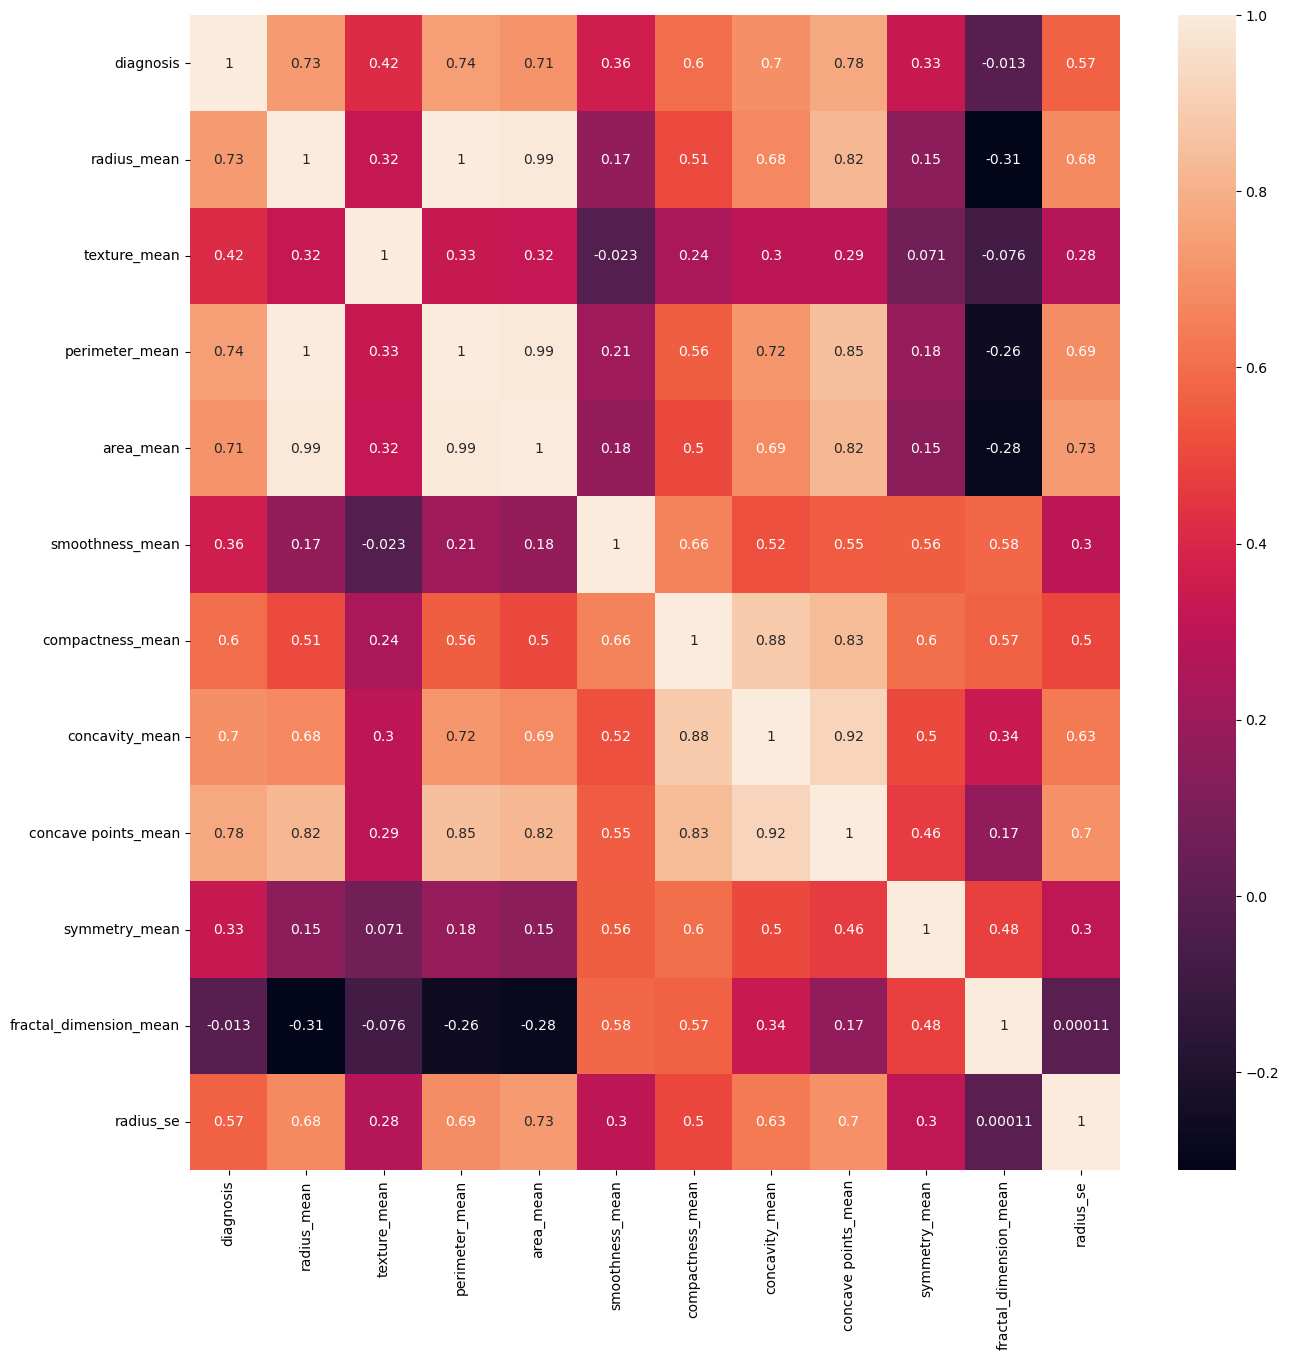

In [141]:
plt.figure (figsize = (15,15))
sns.heatmap(df.iloc[:,0:12].corr(), annot=True)

Looking at the correlation matrix and the heat map, we are abe to see that there is a good correlation between the dimentions of the tumor and its diagnosis. using this information, we are going to plot these columns from the database. We are going to use the mean column of these dimentions.

In [144]:
# Assigning the columns to a variable to plot just some of the variables as there are too many
columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'concave points_mean']

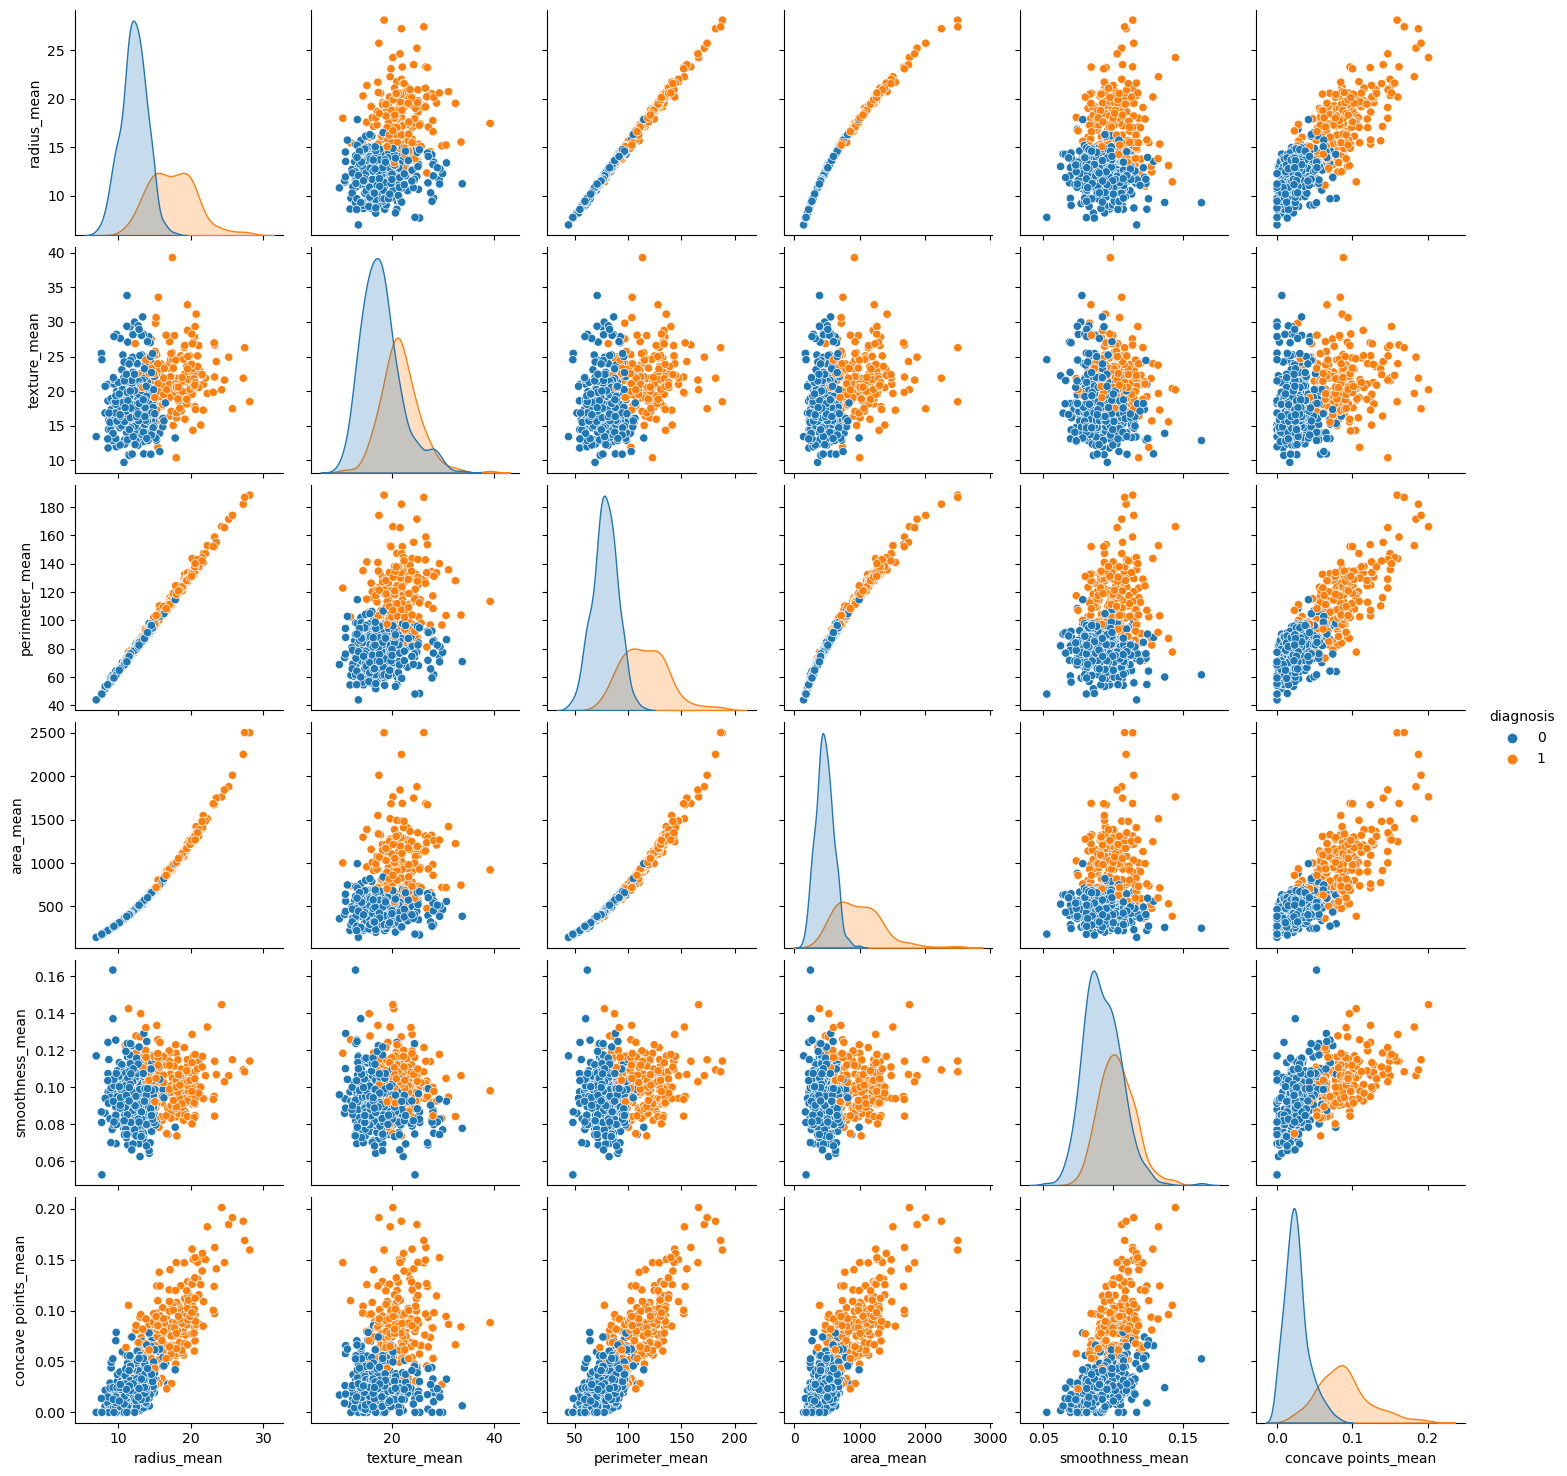

In [145]:
# Ploting the columns above 
sns.pairplot(df[columns], hue="diagnosis")

Now that we are aware of the correlations we are going to use to train our classifiers. Its time to separate our data into inputs and outputs. For our dataset the inputs are going to be the characteristics of the tumour masses and the output will be the diagnosis.

In [146]:
### Do I need to fix the Multicollinearity?

In [147]:
### Standardize the DATA


Now that we are aware of the correlations and chose which data, we are going to use to train our classifiers. Its time to separate our data into inputs and outputs. For our dataset the inputs are going to be the characteristics of the tumour masses and the output will be the diagnosis.

In [265]:
# Separating the data
#  Input containing the independent variables
input = df.iloc[:, 2:31]
#  output containing the diagnosis
# Fixed the error changing it to a 1 dimentional array
output = df['diagnosis']


We divided the data into the independent and dependent variables and now we are going to divide it into testing data and training data. For that we are going to use the [Sklearn Model Selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) function.
It takes the input data, the output data, and the proportion of the test size wanted as parameters. it returns a randomized test sized according to the proportions selected. 

In [308]:
input_train, input_test, output_train, output_test = mod.train_test_split(input, output, test_size=0.40)

## Populating and Fitting the Classifiers

### K-Nearest Neighbor (KNN)

In [309]:
# Initializing the Classifier
# Leaving the number of neighbors at 5 right now as it is the default. The number effect how many datapoints the classifier will look at when deciding if the datapoint belong to the assinged group
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [310]:
# Fitting the classifier, passing the training data to it
knn.fit(input_train, output_train)

KNeighborsClassifier()

In [311]:
# Testing if the predictions matches the output_test
prediction = (knn.predict(input_test) == output_test)


# Printing the result
print("This classifier got: ", prediction.sum(), "out of ", output_test.count() )

This classifier got:  207 out of  228


C:\Users\renan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
